### Load Datasets

In [1]:
from sklearn.datasets import load_svmlight_file
X_train, Y_train = load_svmlight_file("a9a.txt", n_features = 123)
X_test, Y_test = load_svmlight_file("a9a_t.txt", n_features = 123)

### Preprocess datasets

In [2]:
import numpy as np 
X_train = X_train.toarray()
X_test = X_test.toarray()
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))
X_train = np.column_stack((X_train, np.ones((X_train.shape[0],1))))
X_test = np.column_stack((X_test, np.ones((X_test.shape[0],1))))
Y_train = 0.5*(1+Y_train)
Y_test = 0.5*(1+Y_test)

### Define loss function and optimize function

In [3]:
import math

# hw(x)
def hwx(x,w):
    return 1/(1+np.exp(-np.dot(x,w)))

# E-in loss function
def loss(x,y,w):
    # y = 0.5*(1+y)
    hw = hwx(x,w)
    loss = np.average(np.power((hw - y),2), axis = 0)
    return loss

# optimize function
def optimize(x,y,w,learning_rate):
    grad = np.average((hwx(x,w)-y)*x, axis = 0)
    w -= learning_rate*grad.reshape(-1,1)
    return w

### Train function and Hyper-parameters

In [34]:
import sys
import random

msgd_learning_rate = 0.01
msgd_max_epoches = 1000
msgd_batch_size = 100
msgd_max_steps = X_train.shape[0]//msgd_batch_size

# MSGD train function 
def train_msgd(x_train,y_train,x_test, y_test,learning_rate, max_epoches, batch_size, max_steps):
    losses_train = []
    losses_test = []
    
    w = np.ones((x_train.shape[1],1))
    
    for epoch in range(max_epoches):
        for step in range(max_steps):
            temp = step
            step = random.randint(0,x_train.shape[0]-batch_size)
            x = x_train[step:step+batch_size]
            y = y_train[step:step+batch_size]
            w = optimize(x,y,w,learning_rate)
            step = temp
        losses_train.append(loss(x_train, y_train, w))
        losses_test.append(loss(x_test, y_test, w))
        print("Epoch: %3d / %3d" %(epoch+1, max_epoches))
        sys.stdout.write('\n')
    print('\n')
    return losses_train, losses_test, w

gd_learning_rate = 0.01
gd_max_epoches = 1000

# Full GD train function
def train_gd(x_train,y_train,x_test, y_test,learning_rate, max_epoches):
    losses_train = []
    losses_test = []    
    w = np.ones((x_train.shape[1],1))    
    for epoch in range(max_epoches):
        w = optimize(x_train,y_train,w,learning_rate)
        losses_train.append(loss(x_train, y_train, w))
        losses_test.append(loss(x_test, y_test, w))
        print("Epoch: %3d / %3d" %(epoch+1, max_epoches))
        sys.stdout.write('\')
    print('\n')
    return losses_train, losses_test, w

Epoch: 300 / 300

Epoch: 700 / 700

MSGD Result: 
             precision    recall  f1-score   support

    postive     0.8825    0.9292    0.9052     12435
    negtive     0.7239    0.5998    0.6561      3846

avg / total     0.8450    0.8514    0.8464     16281

FullGD Result: 
             precision    recall  f1-score   support

    postive     0.8192    0.8695    0.8436     12435
    negtive     0.4734    0.3794    0.4212      3846

avg / total     0.7375    0.7537    0.7438     16281



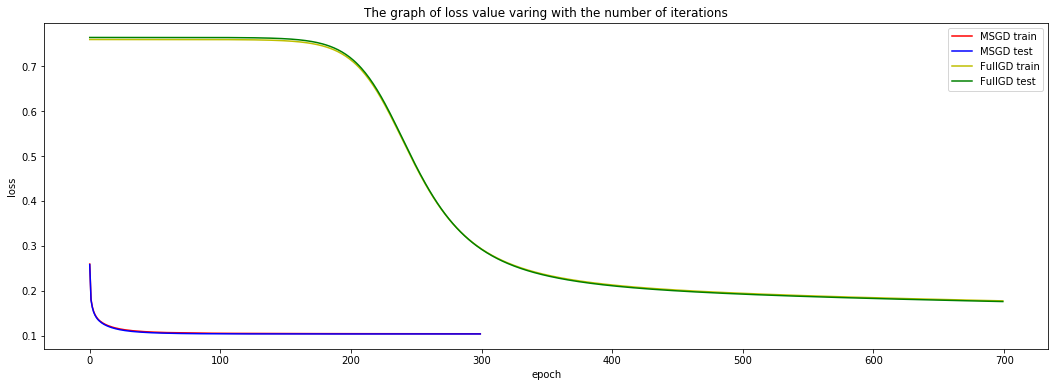

In [33]:
msgd_losses_train, msgd_losses_test, msgd_w = train_msgd(
    X_train, Y_train, X_test, Y_test,msgd_learning_rate, msgd_max_epoches, msgd_batch_size, msgd_max_steps)
gd_losses_train, gd_losses_test, gd_w = train_gd(
    X_train, Y_train, X_test, Y_test,gd_learning_rate, gd_max_epoches)

from sklearn.metrics import classification_report
print("MSGD Result: ")
print(classification_report(Y_test, np.where(hwx(X_test,msgd_w)>0.5, 1, 0), target_names=["postive", "negtive"], digits=4))
print("FullGD Result: ")
print(classification_report(Y_test, np.where(hwx(X_test,gd_w)>0.5, 1, 0), target_names=["postive", "negtive"], digits=4))


In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(msgd_losses_train, color="r", label="MSGD train")
plt.plot(msgd_losses_test, color="b", label="MSGD test")
plt.plot(gd_losses_train, color="y", label="FullGD train")
plt.plot(gd_losses_test, color="g", label="FullGD test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")
plt.show()